In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Now we need to read in the data
df = pd.read_csv(r'C:\Users\prave\Downloads\Tvshows.csv', encoding='latin-1')

In [2]:
df.head()

,id,name,number_of_seasons,number_of_episodes,original_language,vote_count,vote_average,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origin_country,spoken_languages,production_companies,production_countries,episode_run_time
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Ãlex Pina,es,"Netflix, Antena 3",ES,EspaÃ±ol,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45


In [3]:
# We need to see if we have any missing data
# Let's loop through the data and see if there is anything missing

for col in df.columns:
    data_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(data_missing*100)))

id - 0%
name - 0%
number_of_seasons - 0%
number_of_episodes - 0%
original_language - 0%
vote_count - 0%
vote_average - 0%
overview - 45%
adult - 0%
backdrop_path - 54%
first_air_date - 19%
last_air_date - 18%
homepage - 70%
in_production - 0%
original_name - 0%
popularity - 0%
poster_path - 36%
type - 0%
status - 0%
tagline - 97%
genres - 41%
created_by - 78%
languages - 35%
networks - 42%
origin_country - 18%
spoken_languages - 35%
production_companies - 65%
production_countries - 54%
episode_run_time - 0%


In [4]:
print(df.dtypes)

id                        int64
name                     object
number_of_seasons         int64
number_of_episodes        int64
original_language        object
vote_count                int64
vote_average            float64
overview                 object
adult                      bool
backdrop_path            object
first_air_date           object
last_air_date            object
homepage                 object
in_production              bool
original_name            object
popularity              float64
poster_path              object
type                     object
status                   object
tagline                  object
genres                   object
created_by               object
languages                object
networks                 object
origin_country           object
spoken_languages         object
production_companies     object
production_countries     object
episode_run_time          int64
dtype: object


In [5]:
#Rename the columns

df = df.rename(columns={'vote_average': 'voteaverage'})
df = df.rename(columns={'vote_count': 'votecount'})
df = df.rename(columns={'first_air_date': 'firstairdate'})
df = df.rename(columns={'number_of_seasons': 'numberofseasons'})
df = df.rename(columns={'number_of_episodes': 'numberofepisodes'})
df = df.rename(columns={'original_language': 'originallanguage'})
df = df.rename(columns={'last_air_date': 'lastairdate'})
df = df.rename(columns={'in_production': 'inproduction'})
df = df.rename(columns={'original_name': 'originalname'})
df = df.rename(columns={'poster_path': 'posterpath'})
df = df.rename(columns={'origin_country': 'origincountry'})
df = df.rename(columns={'production_countries': 'productioncountries'})
df = df.rename(columns={'production_companies': 'productioncompanies'})
df = df.rename(columns={'episode_run_time': 'episoderuntime'})

In [6]:
df

,id,name,numberofseasons,numberofepisodes,originallanguage,votecount,voteaverage,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origincountry,spoken_languages,productioncompanies,productioncountries,episoderuntime
0,1399,Game of Thrones,8,73,en,21857,8.442,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8.257,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Ãlex Pina,es,"Netflix, Antena 3",ES,EspaÃ±ol,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8.624,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8.121,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8.486,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168634,239099,æ¯ä¹³é ±æ³è¦å·åºæ¥,1,1,zh,0,0.000,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,CN,NaN,NaN,NaN,0
168635,241205,Barbie Dream Squad,1,1,es,0,0.000,NaN,False,NaN,...,NaN,NaN,"Dee Shipley, Blair Davidson",NaN,NaN,US,NaN,NaN,NaN,0
168636,240696,Picasso,1,1,bn,0,0.000,"Murder, art and a journalist's relentless ques...",False,/fseBBbvHtdcZS5M7bSjOxYsVe5.jpg,...,NaN,Crime,NaN,bn,NaN,IN,à¦¬à¦¾à¦à¦²à¦¾,NaN,India,0
168637,240697,å¥³å­å¤§çå±éºãªã¢ã«ãã¤ã,1,1,en,0,0.000,A college student gets into trouble when she m...,False,NaN,...,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,0


In [7]:
df['popularity'] = df['popularity'].astype('int64')

df['voteaverage'] = df['voteaverage'].astype('int64')

df 

,id,name,numberofseasons,numberofepisodes,originallanguage,votecount,voteaverage,overview,adult,backdrop_path,...,tagline,genres,created_by,languages,networks,origincountry,spoken_languages,productioncompanies,productioncountries,episoderuntime
0,1399,Game of Thrones,8,73,en,21857,8,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,Winter Is Coming,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0
1,71446,Money Heist,3,41,es,17836,8,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,The perfect robbery.,"Crime, Drama",Ãlex Pina,es,"Netflix, Antena 3",ES,EspaÃ±ol,Vancouver Media,Spain,70
2,66732,Stranger Things,4,34,en,16161,8,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,Every ending has a beginning.,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0
3,1402,The Walking Dead,11,177,en,15432,8,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,Fight the dead. Fear the living.,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42
4,63174,Lucifer,6,93,en,13870,8,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,It's good to be bad.,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168634,239099,æ¯ä¹³é ±æ³è¦å·åºæ¥,1,1,zh,0,0,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,CN,NaN,NaN,NaN,0
168635,241205,Barbie Dream Squad,1,1,es,0,0,NaN,False,NaN,...,NaN,NaN,"Dee Shipley, Blair Davidson",NaN,NaN,US,NaN,NaN,NaN,0
168636,240696,Picasso,1,1,bn,0,0,"Murder, art and a journalist's relentless ques...",False,/fseBBbvHtdcZS5M7bSjOxYsVe5.jpg,...,NaN,Crime,NaN,bn,NaN,IN,à¦¬à¦¾à¦à¦²à¦¾,NaN,India,0
168637,240697,å¥³å­å¤§çå±éºãªã¢ã«ãã¤ã,1,1,en,0,0,A college student gets into trouble when she m...,False,NaN,...,NaN,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,0


In [8]:
# CREATING CORRECT YEAR COLUMN

df['Year'] = df['firstairdate'].astype(str).str[-4:]
df

,id,name,numberofseasons,numberofepisodes,originallanguage,votecount,voteaverage,overview,adult,backdrop_path,...,genres,created_by,languages,networks,origincountry,spoken_languages,productioncompanies,productioncountries,episoderuntime,Year
0,1399,Game of Thrones,8,73,en,21857,8,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0,2011
1,71446,Money Heist,3,41,es,17836,8,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,"Crime, Drama",Ãlex Pina,es,"Netflix, Antena 3",ES,EspaÃ±ol,Vancouver Media,Spain,70,2017
2,66732,Stranger Things,4,34,en,16161,8,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0,2016
3,1402,The Walking Dead,11,177,en,15432,8,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42,2010
4,63174,Lucifer,6,93,en,13870,8,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168634,239099,æ¯ä¹³é ±æ³è¦å·åºæ¥,1,1,zh,0,0,NaN,False,NaN,...,NaN,NaN,NaN,NaN,CN,NaN,NaN,NaN,0,2023
168635,241205,Barbie Dream Squad,1,1,es,0,0,NaN,False,NaN,...,NaN,"Dee Shipley, Blair Davidson",NaN,NaN,US,NaN,NaN,NaN,0,nan
168636,240696,Picasso,1,1,bn,0,0,"Murder, art and a journalist's relentless ques...",False,/fseBBbvHtdcZS5M7bSjOxYsVe5.jpg,...,Crime,NaN,bn,NaN,IN,à¦¬à¦¾à¦à¦²à¦¾,NaN,India,0,2023
168637,240697,å¥³å­å¤§çå±éºãªã¢ã«ãã¤ã,1,1,en,0,0,A college student gets into trouble when she m...,False,NaN,...,NaN,NaN,NaN,NaN,US,NaN,NaN,NaN,0,1990


In [9]:
df.sort_values(by=['popularity'], inplace=False, ascending=False)

,id,name,numberofseasons,numberofepisodes,originallanguage,votecount,voteaverage,overview,adult,backdrop_path,...,genres,created_by,languages,networks,origincountry,spoken_languages,productioncompanies,productioncountries,episoderuntime,Year
1771,63770,The Late Show with Stephen Colbert,9,1419,en,205,6,Stephen Colbert brings his signature satire an...,False,/gMMnf8VRg3Z98WaFmOLr9Jk8pIs.jpg,...,"Comedy, Talk","Jon Stewart, Stephen Colbert, Tom Purcell, Chr...",en,CBS,US,English,"Spartina Productions, CBS Studios",United States of America,41,2015
3035,215803,Batang Quiapo,2,178,tl,99,7,A young man rises to be one of the biggest out...,False,/jIV5weV19wH02rnuWyMtYI4dYC8.jpg,...,"Action & Adventure, Comedy, Drama",NaN,tl,"TV5, Kapamilya Channel",PH,NaN,"ABS-CBN Entertainment, Dreamscape Entertainmen...",Philippines,0,2023
2285,94722,Tagesschau,72,20839,de,145,7,"German daily news program, the oldest still ex...",False,/jWXrQstj7p3Wl5MfYWY6IHqRpDb.jpg,...,News,NaN,de,ARD,DE,Deutsch,NDR,Germany,15,1952
3593,14981,The Late Late Show with Craig Ferguson,11,2057,en,77,7,The Late Late Show with Craig Ferguson is an A...,False,/m0bV3qBiJBBlpFaaKjwHo13MVjm.jpg,...,"Comedy, Talk",NaN,en,CBS,US,English,NaN,United States of America,60,2005
4565,2261,The Tonight Show Starring Johnny Carson,31,2924,en,51,7,The Tonight Show Starring Johnny Carson is a t...,False,/qFfWFwfaEHzDLWLuttWiYq7Poy2.jpg,...,Talk,"Steve Allen, Sylvester Weaver",en,NBC,US,English,"NBC Productions, Carson Productions",United States of America,60,1962
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100752,224100,ã·ã¼ãï¼ã­ã±ãã é®å·èª ï½Keep A-R...,1,1,ja,0,0,NaN,False,NaN,...,NaN,NaN,NaN,NaN,JP,NaN,NaN,NaN,0,2023
100751,213464,ì°ì»´ í¬ K-POPìë,1,1,ko,0,0,NaN,False,NaN,...,NaN,NaN,NaN,NaN,KR,NaN,NaN,NaN,0,2022
100750,157530,æ·®æ²³å ­ç«,1,6,zh,0,0,NaN,False,NaN,...,Documentary,NaN,zh,Anhui Broadcasting Corporation,CN,æ®éè¯,NaN,NaN,0,2014
51037,119889,Unseamly: The Investigation of Peter NygÃ¥rd,1,4,en,1,6,An investigation into multiple allegations of ...,False,/zvXd4Gyk6PJeGlrZT6XzDOz76gf.jpg,...,Documentary,NaN,en,"Investigation Discovery, discovery+",US,English,Discovery Channel,United States of America,44,2021


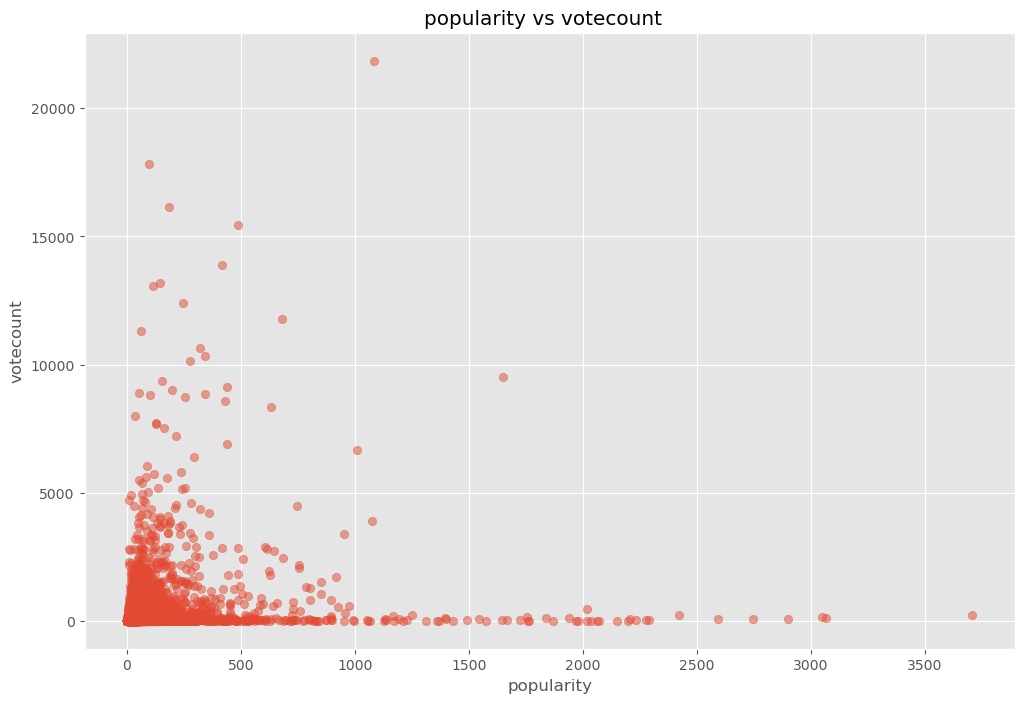

In [10]:
#PLOT POPULARITY VS VOTECOUNT USING SCATTER PLOT
plt.scatter(x=df['popularity'], y=df['votecount'], alpha=0.5)
plt.title('popularity vs votecount  ')
plt.xlabel('popularity')
plt.ylabel('votecount')
plt.show()

<Axes: xlabel='popularity', ylabel='votecount'>

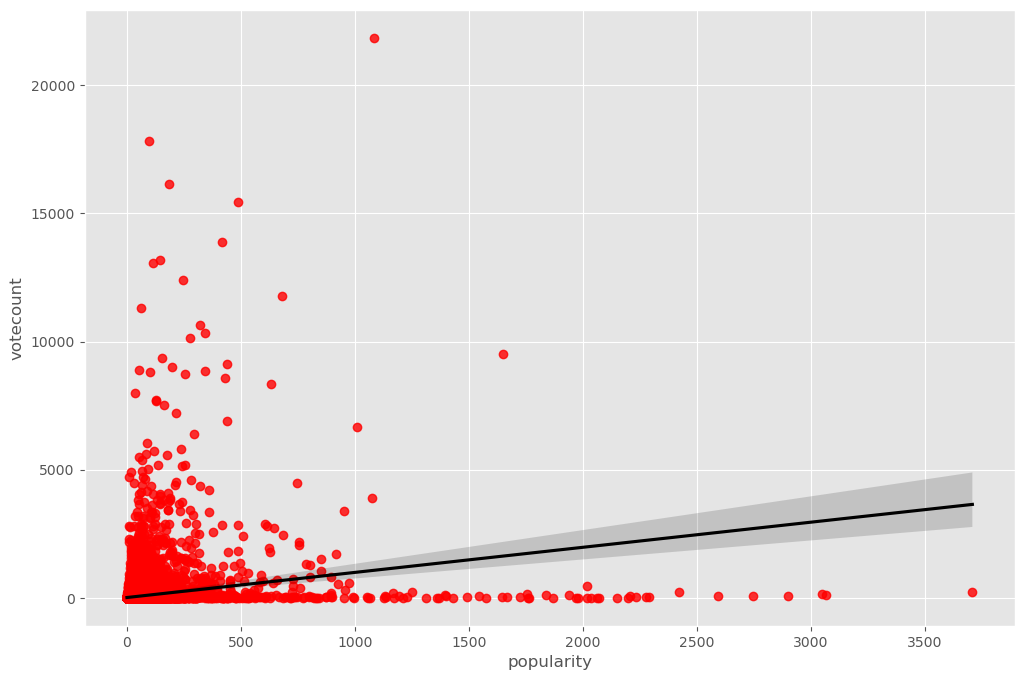

In [11]:
#PLOT POPULARITY VS VOTEAVG USING SEABORN
sns.regplot(x="popularity", y="votecount", data=df,scatter_kws={"color":"red"},line_kws={"color":"black"})

In [12]:
# Correlation Matrix between all numeric columns

df.corr(method ='pearson')

C:\Users\prave\AppData\Local\Temp\ipykernel_27716\2805906452.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='pearson')


,id,numberofseasons,numberofepisodes,votecount,voteaverage,adult,inproduction,popularity,episoderuntime
id,1.000000,-0.065146,-0.067419,-0.048987,-0.167175,0.029984,0.484207,-0.051858,-0.168339
numberofseasons,-0.065146,1.000000,0.416187,0.066078,0.155949,-0.014074,0.118874,0.190024,0.063044
numberofepisodes,-0.067419,0.416187,1.000000,0.035587,0.089726,-0.016900,0.014981,0.342332,0.033304
votecount,-0.048987,0.066078,0.035587,1.000000,0.105482,-0.007057,-0.025393,0.215945,0.018150
voteaverage,-0.167175,0.155949,0.089726,0.105482,1.000000,0.026504,-0.143992,0.120349,0.155011
adult,0.029984,-0.014074,-0.016900,-0.007057,0.026504,1.000000,-0.029323,-0.014025,-0.021553
inproduction,0.484207,0.118874,0.014981,-0.025393,-0.143992,-0.029323,1.000000,-0.003528,-0.154134
popularity,-0.051858,0.190024,0.342332,0.215945,0.120349,-0.014025,-0.003528,1.000000,0.028204
episoderuntime,-0.168339,0.063044,0.033304,0.018150,0.155011,-0.021553,-0.154134,0.028204,1.000000


In [13]:
df.corr(method ='kendall')

C:\Users\prave\AppData\Local\Temp\ipykernel_27716\1080062093.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='kendall')
C:\Users\prave\Documents\python\Lib\site-packages\scipy\stats\_stats_py.py:5278: RuntimeWarning: overflow encountered in scalar multiply
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


,id,numberofseasons,numberofepisodes,votecount,voteaverage,adult,inproduction,popularity,episoderuntime
id,1.000000,0.102036,0.000911,-0.160146,-0.121332,0.033431,0.409463,-0.083711,-0.257014
numberofseasons,0.102036,1.000000,0.594860,0.279631,0.254033,0.001881,0.224396,0.368370,0.144456
numberofepisodes,0.000911,0.594860,1.000000,0.310137,0.279369,-0.049595,0.003944,0.473159,0.184167
votecount,-0.160146,0.279631,0.310137,1.000000,0.814628,0.009482,-0.168346,0.516253,0.286940
voteaverage,-0.121332,0.254033,0.279369,0.814628,1.000000,0.022348,-0.138963,0.428578,0.254753
adult,0.033431,0.001881,-0.049595,0.009482,0.022348,1.000000,-0.029323,-0.087754,-0.025343
inproduction,0.409463,0.224396,0.003944,-0.168346,-0.138963,-0.029323,1.000000,-0.119139,-0.259875
popularity,-0.083711,0.368370,0.473159,0.516253,0.428578,-0.087754,-0.119139,1.000000,0.275954
episoderuntime,-0.257014,0.144456,0.184167,0.286940,0.254753,-0.025343,-0.259875,0.275954,1.000000


In [14]:
df.corr(method ='spearman')

C:\Users\prave\AppData\Local\Temp\ipykernel_27716\1164575377.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method ='spearman')


,id,numberofseasons,numberofepisodes,votecount,voteaverage,adult,inproduction,popularity,episoderuntime
id,1.000000,0.137789,0.016461,-0.205357,-0.161643,0.040944,0.501486,-0.109196,-0.350938
numberofseasons,0.137789,1.000000,0.695548,0.315056,0.289335,0.001995,0.237990,0.419794,0.171016
numberofepisodes,0.016461,0.695548,1.000000,0.390540,0.357677,-0.058993,0.004691,0.588284,0.249429
votecount,-0.205357,0.315056,0.390540,1.000000,0.940939,0.010153,-0.180265,0.582443,0.344956
voteaverage,-0.161643,0.289335,0.357677,0.940939,1.000000,0.023986,-0.149151,0.502885,0.305984
adult,0.040944,0.001995,-0.058993,0.010153,0.023986,1.000000,-0.029323,-0.096135,-0.028354
inproduction,0.501486,0.237990,0.004691,-0.180265,-0.149151,-0.029323,1.000000,-0.130518,-0.290748
popularity,-0.109196,0.419794,0.588284,0.582443,0.502885,-0.096135,-0.130518,1.000000,0.340890
episoderuntime,-0.350938,0.171016,0.249429,0.344956,0.305984,-0.028354,-0.290748,0.340890,1.000000


C:\Users\prave\AppData\Local\Temp\ipykernel_27716\278848497.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method ='spearman')


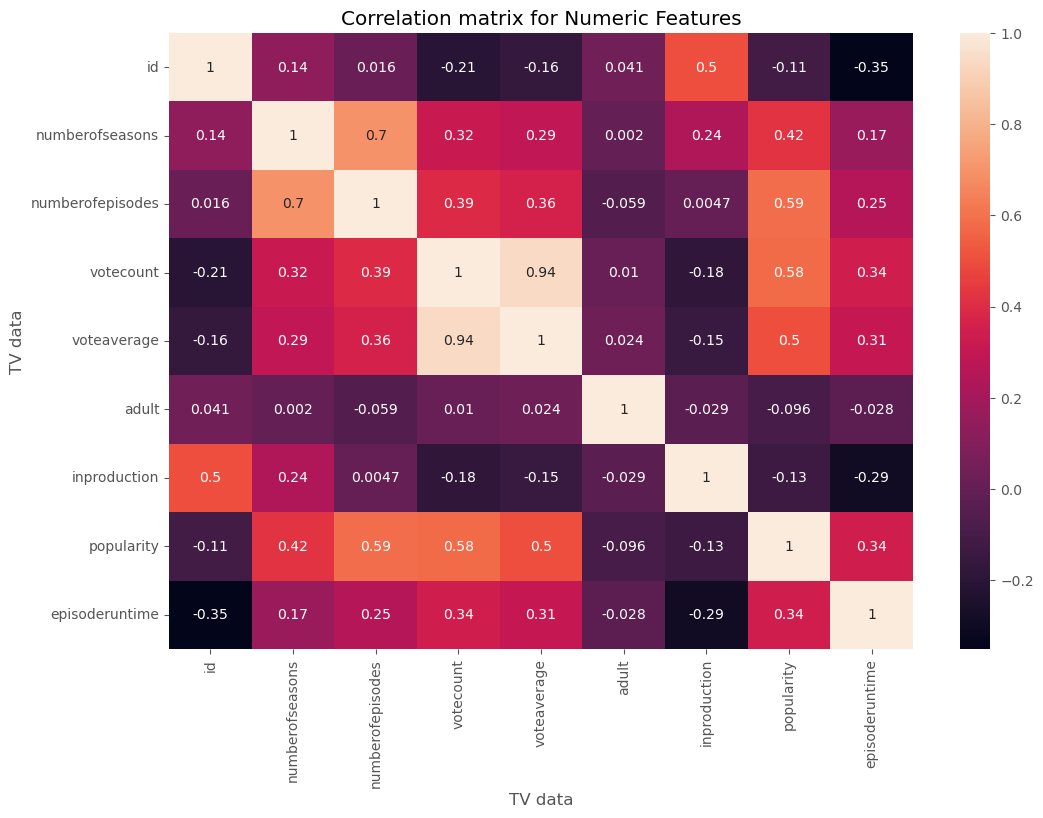

In [15]:
correlation_matrix = df.corr(method ='spearman')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("TV data")

plt.ylabel("TV data")

plt.show()

In [16]:
df.head()

,id,name,numberofseasons,numberofepisodes,originallanguage,votecount,voteaverage,overview,adult,backdrop_path,...,genres,created_by,languages,networks,origincountry,spoken_languages,productioncompanies,productioncountries,episoderuntime,Year
0,1399,Game of Thrones,8,73,en,21857,8,Seven noble families fight for control of the ...,False,/2OMB0ynKlyIenMJWI2Dy9IWT4c.jpg,...,"Sci-Fi & Fantasy, Drama, Action & Adventure","David Benioff, D.B. Weiss",en,HBO,US,English,"Revolution Sun Studios, Television 360, Genera...","United Kingdom, United States of America",0,2011
1,71446,Money Heist,3,41,es,17836,8,"To carry out the biggest heist in history, a m...",False,/gFZriCkpJYsApPZEF3jhxL4yLzG.jpg,...,"Crime, Drama",Ãlex Pina,es,"Netflix, Antena 3",ES,EspaÃ±ol,Vancouver Media,Spain,70,2017
2,66732,Stranger Things,4,34,en,16161,8,"When a young boy vanishes, a small town uncove...",False,/2MaumbgBlW1NoPo3ZJO38A6v7OS.jpg,...,"Drama, Sci-Fi & Fantasy, Mystery","Matt Duffer, Ross Duffer",en,Netflix,US,English,"21 Laps Entertainment, Monkey Massacre Product...",United States of America,0,2016
3,1402,The Walking Dead,11,177,en,15432,8,Sheriff's deputy Rick Grimes awakens from a co...,False,/x4salpjB11umlUOltfNvSSrjSXm.jpg,...,"Action & Adventure, Drama, Sci-Fi & Fantasy",Frank Darabont,en,AMC,US,English,"AMC Studios, Circle of Confusion, Valhalla Mot...",United States of America,42,2010
4,63174,Lucifer,6,93,en,13870,8,"Bored and unhappy as the Lord of Hell, Lucifer...",False,/aDBRtunw49UF4XmqfyNuD9nlYIu.jpg,...,"Crime, Sci-Fi & Fantasy",Tom Kapinos,en,"FOX, Netflix",US,English,"Warner Bros. Television, DC Entertainment, Jer...",United States of America,45,2016


In [17]:

# Looking at the top 15 compaies by popularity

CompanyGrossSum = df.groupby('productioncompanies')[["popularity"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('popularity', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['popularity'].astype('int64') 

CompanyGrossSumSorted

productioncompanies
EstÃºdios Globo                                                                     11067
Televisa                                                                             8605
TVB                                                                                  7378
GMA Entertainment Group                                                              5398
Dreamscape Entertainment Television                                                  4723
BBC                                                                                  4490
Disney Television Animation                                                          4480
Cartoon Network Studios                                                              4085
Spartina Productions, CBS Studios                                                    3707
Paramount Television Studios                                                         3323
NDR                                                                             

In [18]:
df.groupby(['productioncompanies','Year'])[["votecount"]].sum()

,,votecount
productioncompanies,Year,
#LetsDoeit,nan,0
(Colossal) Pictures,1991,7
"(Colossal) Pictures, MTV Animation, MTV",1991,122
(ì£¼)êµ¿ì¤í ë¦¬,2010,9
"(ì£¼)ìì¤ë¹ì ìì´, ì´ì¹ë¹ì¤íëì¤",2023,0
...,...,...
íë¡ëì  ê·¸ë¦¬ë¯¸,2001,0
íëë,2022,0
íë ì´ê·¸ë¨,2022,0


In [34]:
df_numerized = df

for col_name in df_numerized.columns:

    if(df_numerized[col_name].dtype == 'object'):
         df_numerized[col_name]= df_numerized[col_name].astype('category')
         df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,id,name,numberofseasons,numberofepisodes,originallanguage,votecount,voteaverage,overview,adult,backdrop_path,...,genres,created_by,languages,networks,origincountry,spoken_languages,productioncompanies,productioncountries,episoderuntime,Year
0,1399,41894,8,73,20,21857,8,62076,False,3001,...,2002,5179,305,2659,706,167,18191,1186,0,75
1,71446,75133,3,41,22,17836,8,82096,False,34448,...,974,25378,611,4103,322,434,23996,1095,70,81
2,66732,103893,4,34,20,16161,8,87347,False,2932,...,1389,15629,305,4100,706,167,181,1195,0,80
3,1402,120365,11,177,20,15432,8,62449,False,70175,...,173,7395,305,246,706,167,722,1195,42,74
4,63174,68576,6,93,20,13870,8,17967,False,21727,...,1027,23262,305,2214,706,167,24592,1195,45,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168634,239099,147920,1,1,104,0,0,-1,False,-1,...,-1,-1,-1,-1,196,-1,-1,-1,0,87
168635,241205,12067,1,1,22,0,0,-1,False,-1,...,-1,5551,-1,-1,706,-1,-1,-1,0,93
168636,240696,86722,1,1,10,0,0,51279,False,33689,...,945,-1,92,-1,465,837,-1,779,0,87
168637,240697,145051,1,1,20,0,0,2941,False,-1,...,-1,-1,-1,-1,706,-1,-1,-1,0,54


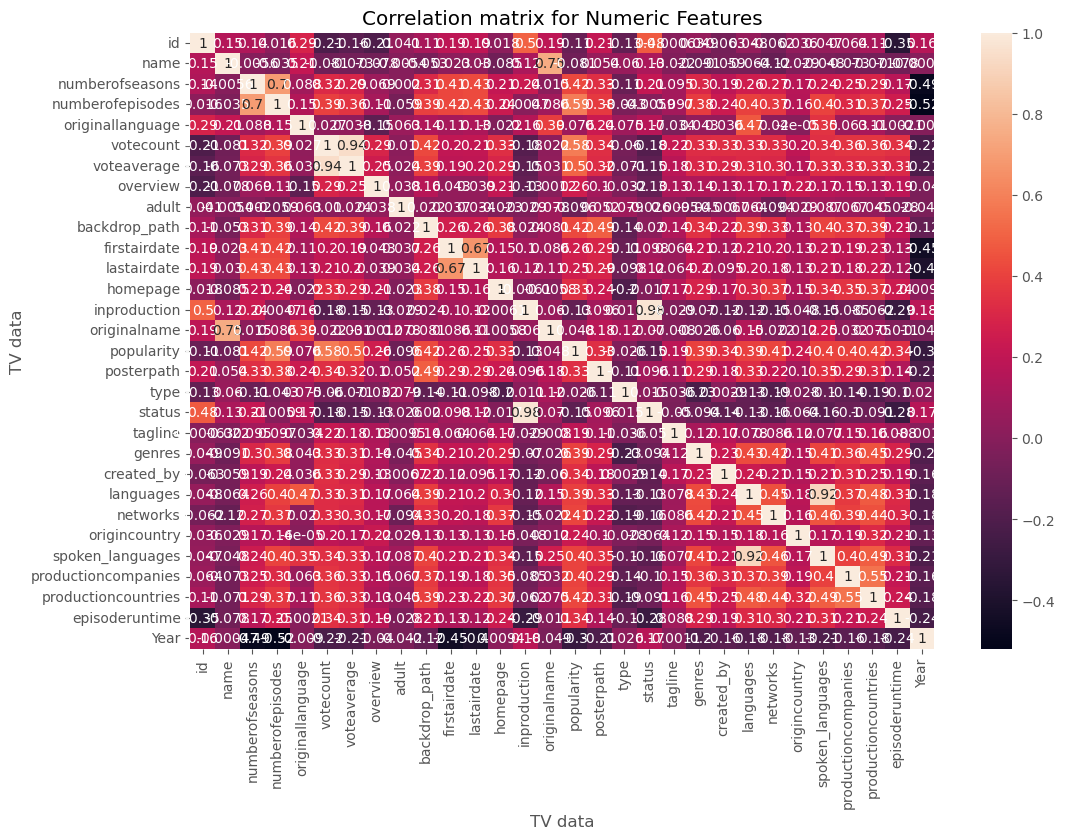

In [35]:
correlation_matrix = df_numerized.corr(method ='spearman')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("TV data")

plt.ylabel("TV data")

plt.show()

In [36]:
df_numerized.corr()

,id,name,numberofseasons,numberofepisodes,originallanguage,votecount,voteaverage,overview,adult,backdrop_path,...,genres,created_by,languages,networks,origincountry,spoken_languages,productioncompanies,productioncountries,episoderuntime,Year
id,1.000000,0.152672,-0.065146,-0.067419,0.296129,-0.048987,-0.167175,-0.170843,0.029984,0.071325,...,0.039028,-0.040596,0.071904,-0.029586,0.087937,0.083833,0.045367,0.059832,-0.168339,0.174359
name,0.152672,1.000000,-0.027960,-0.014430,0.244266,-0.007197,-0.068388,-0.011978,-0.005366,-0.045178,...,-0.089280,-0.038945,-0.036196,-0.094417,-0.024652,-0.000235,-0.050588,-0.067862,-0.038254,0.002987
numberofseasons,-0.065146,-0.027960,1.000000,0.416187,-0.012476,0.066078,0.155949,0.035256,-0.014074,0.112062,...,0.164639,0.069787,0.070349,0.101860,0.064442,0.033863,0.082036,0.116865,0.063044,-0.214367
numberofepisodes,-0.067419,-0.014430,0.416187,1.000000,0.008196,0.035587,0.089726,0.031997,-0.016900,0.065623,...,0.103681,0.058792,0.055187,0.066804,0.031581,0.041666,0.060765,0.068083,0.033304,-0.117850
originallanguage,0.296129,0.244266,-0.012476,0.008196,1.000000,-0.027914,0.006448,-0.171581,0.013838,0.103006,...,0.054353,0.022180,0.510242,0.068200,-0.008008,0.402505,0.037937,0.083780,-0.009676,0.034087
votecount,-0.048987,-0.007197,0.066078,0.035587,-0.027914,1.000000,0.105482,0.041252,-0.007057,0.056088,...,0.037330,0.074273,0.013629,0.029677,0.058032,0.005918,0.063418,0.084748,0.018150,-0.011693
voteaverage,-0.167175,-0.068388,0.155949,0.089726,0.006448,0.105482,1.000000,0.198871,0.026504,0.320095,...,0.262448,0.235926,0.261789,0.231827,0.167315,0.254110,0.265181,0.317317,0.155011,-0.146527
overview,-0.170843,-0.011978,0.035256,0.031997,-0.171581,0.041252,0.198871,1.000000,0.030954,0.110038,...,0.092803,0.087662,0.084394,0.090337,0.178654,0.074136,0.097203,0.118493,0.079425,-0.031092
adult,0.029984,-0.005366,-0.014074,-0.016900,0.013838,-0.007057,0.026504,0.030954,1.000000,0.018550,...,-0.058019,-0.000953,0.077214,-0.075237,0.034894,0.111203,0.061194,0.048976,-0.021553,-0.016222
backdrop_path,0.071325,-0.045178,0.112062,0.065623,0.103006,0.056088,0.320095,0.110038,0.018550,1.000000,...,0.261993,0.154131,0.301501,0.237540,0.122738,0.304073,0.264796,0.307183,0.086063,-0.042697


In [37]:
correlation_matrix = df.corr()

corr_pairsunstacked = correlation_matrix.unstack()

print(corr_pairsunstacked)

id    id                     1.000000
      name                   0.152672
      numberofseasons       -0.065146
      numberofepisodes      -0.067419
      originallanguage       0.296129
                               ...   
Year  spoken_languages      -0.091257
      productioncompanies   -0.116077
      productioncountries   -0.100333
      episoderuntime        -0.102652
      Year                   1.000000
Length: 900, dtype: float64


In [38]:
sorted_pairs=corr_pairsunstacked.sort_values()
sorted_pairs

Year                 firstairdate          -0.270939
firstairdate         Year                  -0.270939
lastairdate          Year                  -0.247433
Year                 lastairdate           -0.247433
numberofseasons      Year                  -0.214367
                                              ...   
origincountry        origincountry          1.000000
spoken_languages     spoken_languages       1.000000
productioncompanies  productioncompanies    1.000000
originalname         originalname           1.000000
Year                 Year                   1.000000
Length: 900, dtype: float64

In [39]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.4]

print(strong_pairs)

spoken_languages     originallanguage       0.402505
originallanguage     spoken_languages       0.402505
numberofepisodes     numberofseasons        0.416187
numberofseasons      numberofepisodes       0.416187
productioncompanies  productioncountries    0.428351
productioncountries  productioncompanies    0.428351
status               id                     0.461780
id                   status                 0.461780
inproduction         id                     0.484207
id                   inproduction           0.484207
languages            originallanguage       0.510242
originallanguage     languages              0.510242
firstairdate         lastairdate            0.611349
lastairdate          firstairdate           0.611349
name                 originalname           0.747164
originalname         name                   0.747164
languages            spoken_languages       0.860483
spoken_languages     languages              0.860483
status               inproduction           0.

In [40]:
high_corr=sorted_pairs[abs(sorted_pairs) > 0.4]
high_corr

spoken_languages     originallanguage       0.402505
originallanguage     spoken_languages       0.402505
numberofepisodes     numberofseasons        0.416187
numberofseasons      numberofepisodes       0.416187
productioncompanies  productioncountries    0.428351
productioncountries  productioncompanies    0.428351
status               id                     0.461780
id                   status                 0.461780
inproduction         id                     0.484207
id                   inproduction           0.484207
languages            originallanguage       0.510242
originallanguage     languages              0.510242
firstairdate         lastairdate            0.611349
lastairdate          firstairdate           0.611349
name                 originalname           0.747164
originalname         name                   0.747164
languages            spoken_languages       0.860483
spoken_languages     languages              0.860483
status               inproduction           0.

In [42]:
#Surprisingly  1. spoken_languages  &   originallanguage       0.402505
#   2. productioncompanies & productioncountries               0.428351
#has good correlation
    
    